In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset (replace 'path_to_dataset.csv' with the actual file path)
df = pd.read_csv('../IMDBDataset.csv')

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


Accuracy: 0.8565
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



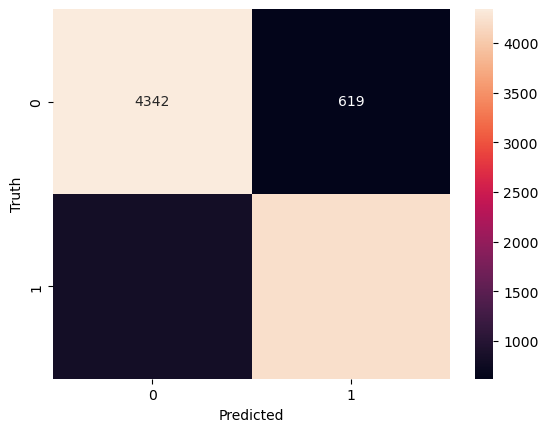

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)

# Predictions
y_pred = clf.predict(X_test_vectors)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

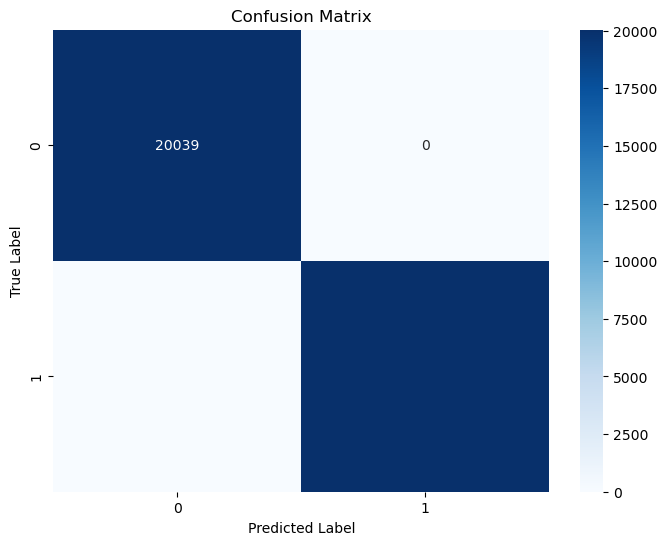

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
#y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Replace with your actual data
y_true = y_train #[1, 1, 1, 0, 0, 1, 0, 0, 0, 0]  # Replace with your actual data

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [6]:
cm

array([[20039,     0],
       [    0, 19961]])

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



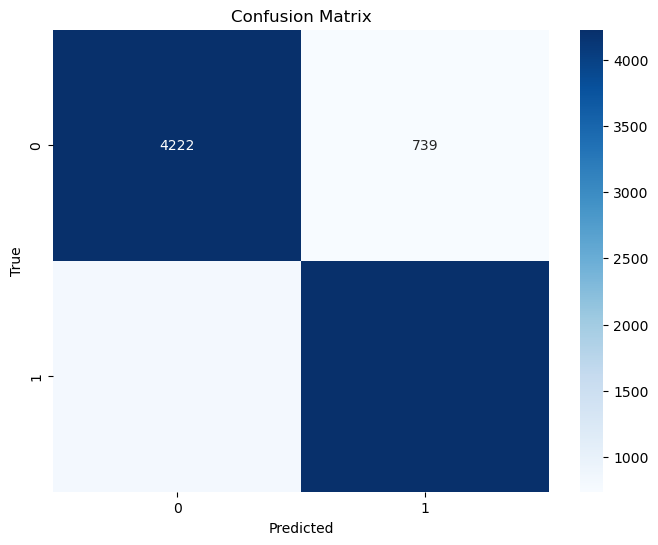

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv('../IMDBDataset.csv')

# Preprocessing and vectorizing text data
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 4: Predictions and Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
cm

array([[4222,  739],
       [ 814, 4225]])

Best Parameters: {'multinomialnb__alpha': 1.5}
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



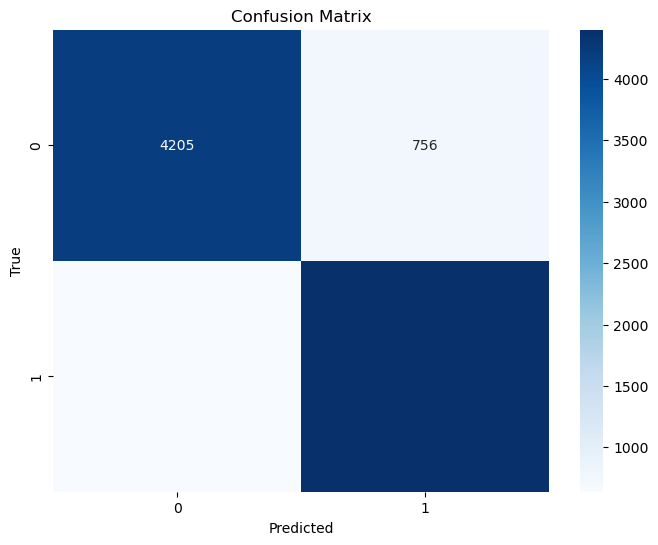

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('../IMDBDataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Improved Text Preprocessing and TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a Naive Bayes classifier pipeline
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB())

# Grid search for hyperparameter tuning
param_grid = {'multinomialnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator
best_nb = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_nb.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
cm

array([[4205,  756],
       [ 638, 4401]])